## 一、GMM算法简介

高斯混合模型（GMM）是一种基于概率的聚类方法，假设数据集由多个高斯分布（也称为“成分”或“簇”）混合生成。与K-Means等传统聚类算法不同，GMM不仅考虑簇的中心，还考虑簇的形状和大小，通过估计每个数据点属于各个簇的概率，实现更为灵活和准确的聚类效果。

GMM在以下场景中表现出色：

- **复杂数据分布**：适用于簇形状不规则、大小不一的数据集。
- **软聚类**：允许数据点属于多个簇，适用于模糊边界的聚类任务。
- **概率解释**：提供每个数据点的聚类概率，有助于后续的统计分析和决策。

## 二、GMM算法原理

### 2.1 概率模型

GMM假设数据集中的每个数据点 $\mathbf{x}_i$ 都由 $K$ 个高斯分布中的一个生成。具体来说，数据点 $\mathbf{x}_i$ 的概率密度函数为：

$$
p(\mathbf{x}_i|\boldsymbol{\theta}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

其中：
- $K$ 是高斯成分的数量。
- $\pi_k$ 是第 $k$ 个高斯成分的混合权重，满足 $\sum_{k=1}^{K} \pi_k = 1$。
- $\mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$ 是第 $k$ 个高斯分布的概率密度函数，参数为均值向量 $\boldsymbol{\mu}_k$ 和协方差矩阵 $\boldsymbol{\Sigma}_k$。

### 2.2 期望最大化（EM）算法

GMM的参数估计通常采用期望最大化（Expectation-Maximization，EM）算法。EM算法是一种迭代优化方法，适用于含有隐含变量或不完全数据的概率模型。

EM算法包含两个主要步骤，E步（期望步）和M步（最大化步），反复迭代直到收敛。

- **E步（Expectation Step）**

在当前参数估计值 $\boldsymbol{\theta}^{(t)} = \{\pi_k^{(t)}, \boldsymbol{\mu}_k^{(t)}, \boldsymbol{\Sigma}_k^{(t)}\}$ 下，计算每个数据点属于第 $k$ 个高斯成分的后验概率（即责任度）：

$$
\gamma_{ik}^{(t)} = \frac{\pi_k^{(t)} \mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_k^{(t)}, \boldsymbol{\Sigma}_k^{(t)})}{\sum_{j=1}^{K} \pi_j^{(t)} \mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_j^{(t)}, \boldsymbol{\Sigma}_j^{(t)})}
$$

- **M步（Maximization Step）**

基于E步计算的责任度，重新估计模型参数：

$$
\pi_k^{(t+1)} = \frac{1}{N} \sum_{i=1}^{N} \gamma_{ik}^{(t)}
$$

$$
\boldsymbol{\mu}_k^{(t+1)} = \frac{\sum_{i=1}^{N} \gamma_{ik}^{(t)} \mathbf{x}_i}{\sum_{i=1}^{N} \gamma_{ik}^{(t)}}
$$

$$
\boldsymbol{\Sigma}_k^{(t+1)} = \frac{\sum_{i=1}^{N} \gamma_{ik}^{(t)} (\mathbf{x}_i - \boldsymbol{\mu}_k^{(t+1)})(\mathbf{x}_i - \boldsymbol{\mu}_k^{(t+1)})^\top}{\sum_{i=1}^{N} \gamma_{ik}^{(t)}}
$$

- **收敛条件**

EM算法在每次迭代中都会增加似然函数的值，直到似然函数的增幅低于预设的阈值或达到最大迭代次数时停止。

## 三、案例分析：GMM聚类实战

本文将通过一个简单的案例，使用Python实现GMM聚类，展示其在模拟数据上的应用效果。

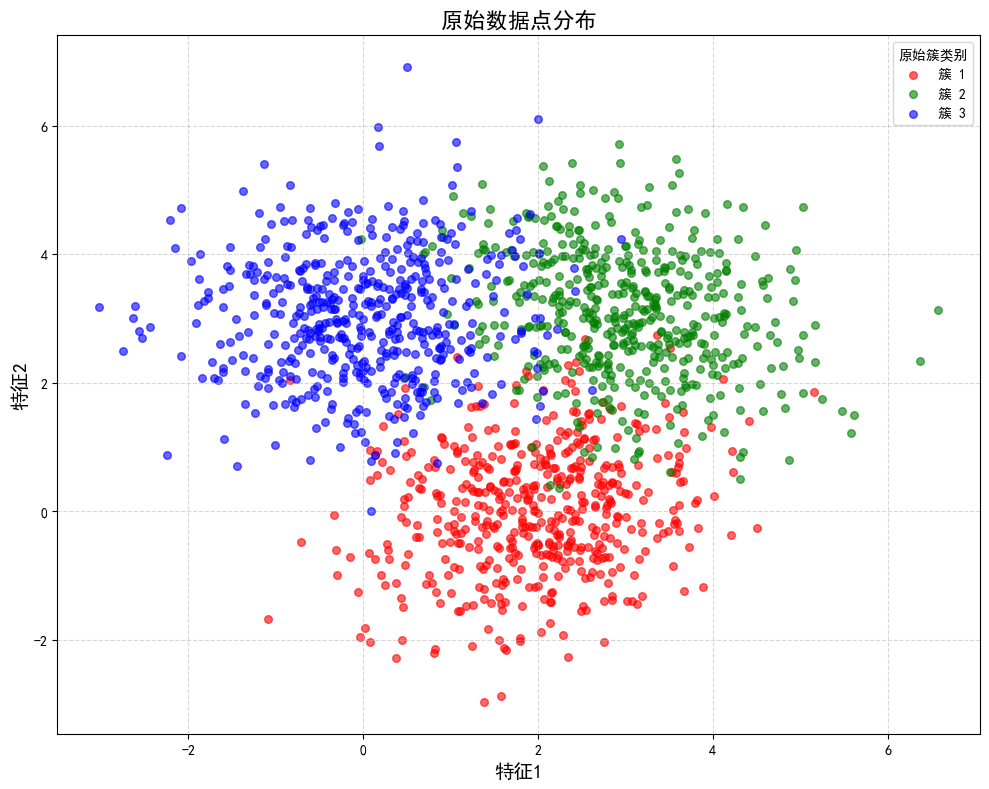

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import matplotlib.patches as patches
import matplotlib.colors as mcolors

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

# 设置随机种子
np.random.seed(42)

# 生成三个高斯分布的样本
n_samples = 500

# 第一个簇
mean1 = [2, 0]
cov1 = [[1, 0.2], [0.2, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# 第二个簇
mean2 = [3, 3]
cov2 = [[1, -0.3], [-0.3, 1]]
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# 第三个簇
mean3 = [0, 3]
cov3 = [[1, 0], [0, 1]]
X3 = np.random.multivariate_normal(mean3, cov3, n_samples)

# 合并数据
X = np.vstack((X1, X2, X3))

# 绘制原始数据点图
plt.figure(figsize=(10, 8))

plt.scatter(X1[:, 0], X1[:, 1], s=30, color='red', label='簇 1', alpha=0.6)
plt.scatter(X2[:, 0], X2[:, 1], s=30, color='green', label='簇 2', alpha=0.6)
plt.scatter(X3[:, 0], X3[:, 1], s=30, color='blue', label='簇 3', alpha=0.6)

plt.title('原始数据点分布', fontsize=16)
plt.xlabel('特征1', fontsize=14)
plt.ylabel('特征2', fontsize=14)
plt.legend(title='原始簇类别')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [2]:
# 定义GMM模型，假设有3个簇
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)

# 拟合GMM模型
gmm.fit(X)

# 预测簇标签
labels = gmm.predict(X)

# 获取GMM的参数
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_

print("GMM混合权重：", weights)
print("GMM均值：\n", means)
print("GMM协方差矩阵：\n", covariances)


GMM混合权重： [0.34443739 0.3287613  0.32680131]
GMM均值：
 [[ 2.95728907  3.11741938]
 [-0.04155174  2.96571577]
 [ 1.9849524  -0.00788892]]
GMM协方差矩阵：
 [[[ 0.99816731 -0.25715754]
  [-0.25715754  1.02762528]]

 [[ 0.91888485 -0.01749   ]
  [-0.01749     0.96829226]]

 [[ 0.89100266  0.17762317]
  [ 0.17762317  0.95128116]]]


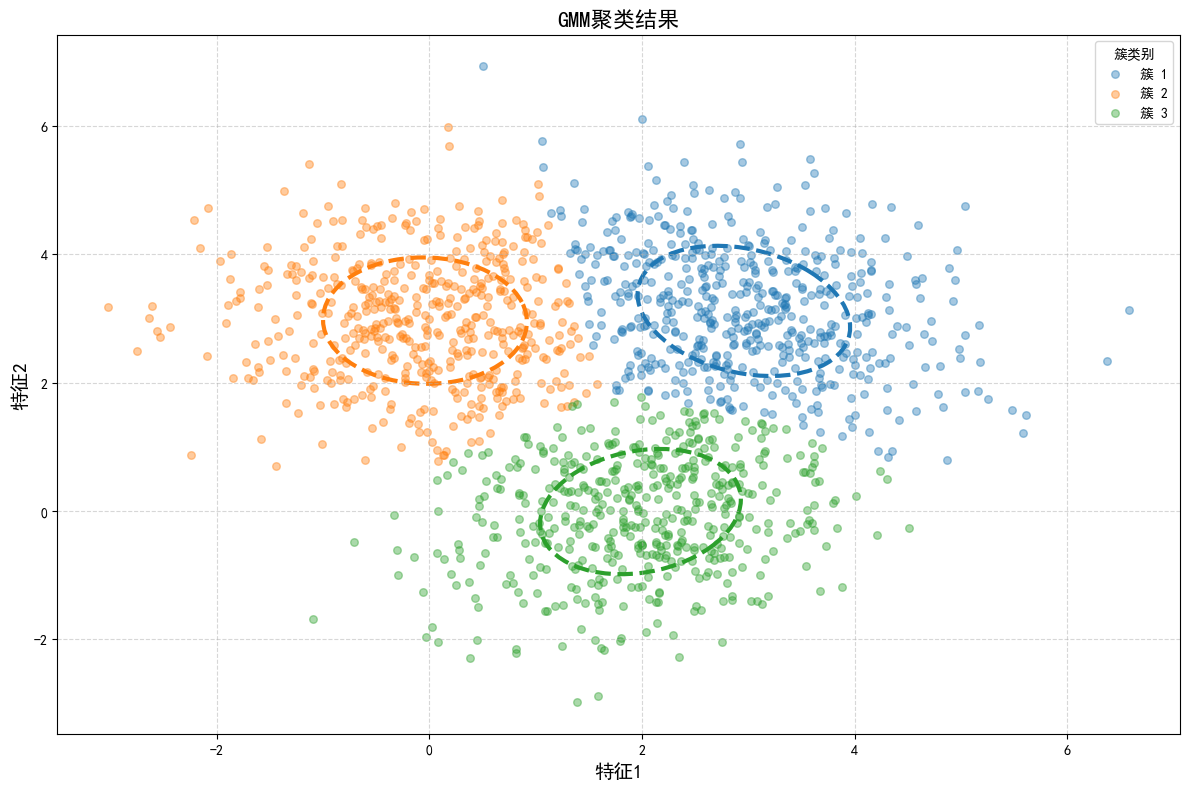

In [3]:

# 定义颜色
colors = list(mcolors.TABLEAU_COLORS.values())

plt.figure(figsize=(12, 8))

# 绘制数据点
for i in range(gmm.n_components):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                s=30, color=colors[i], label=f'簇 {i+1}', alpha=0.4)

# 绘制高斯分布的等高线
ax = plt.gca()

for i in range(gmm.n_components):
    mean = means[i]
    cov = covariances[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
    width, height = 2 * np.sqrt(eigenvalues)
    ellipse = patches.Ellipse(mean, width, height, angle=angle,
                              edgecolor=colors[i], facecolor='none',
                              linewidth=3, linestyle='--')
    ax.add_patch(ellipse)

plt.title('GMM聚类结果', fontsize=16)
plt.xlabel('特征1', fontsize=14)
plt.ylabel('特征2', fontsize=14)
plt.legend(title='簇类别')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
